___
# Logistic Regression Exercise 

In this exercise, we will be working with a fake advertising data set, indicating whether or not a particular internet user clicked on an Advertisement. We will try to create a model that will predict whether or not they will click on an ad based off the features of that user.

This data set contains the following features:

* 'Daily Time Spent on Site': consumer time on site in minutes
* 'Age': cutomer age in years
* 'Area Income': Avg. Income of geographical area of consumer
* 'Daily Internet Usage': Avg. minutes a day consumer is on the internet
* 'Ad Topic Line': Headline of the advertisement
* 'City': City of consumer
* 'Male': Whether or not consumer was male
* 'Country': Country of consumer
* 'Timestamp': Time at which consumer clicked on Ad or closed window
* 'Clicked on Ad': 0 or 1 indicated clicking on Ad

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [41]:
df = pd.read_csv('advertising.csv')

In [42]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Ad Topic Line,City,Male,Country,Timestamp,Clicked on Ad
0,68.95,35,61833.90,256.09,Cloned 5thgeneration orchestration,Wrightburgh,0,Tunisia,2016-03-27 00:53:11,0
1,80.23,31,68441.85,193.77,Monitored national standardization,West Jodi,1,Nauru,2016-04-04 01:39:02,0
2,69.47,26,59785.94,236.50,Organic bottom-line service-desk,Davidton,0,San Marino,2016-03-13 20:35:42,0
3,74.15,29,54806.18,245.89,Triple-buffered reciprocal time-frame,West Terrifurt,1,Italy,2016-01-10 02:31:19,0
4,68.37,35,73889.99,225.58,Robust logistical utilization,South Manuel,0,Iceland,2016-06-03 03:36:18,0


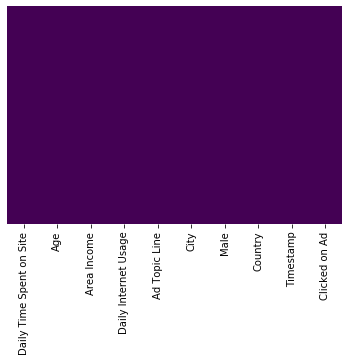

In [43]:
sns.heatmap(df.isnull(), yticklabels = False, cbar= False, cmap = 'viridis')

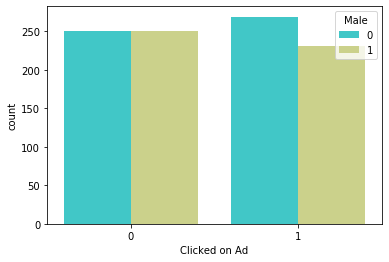

In [44]:
sns.countplot(x= 'Clicked on Ad',hue = 'Male', data = df, palette = 'rainbow')

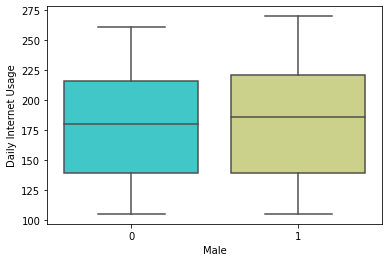

In [51]:
sns.boxplot(x= 'Male', y = 'Daily Internet Usage', data = df, palette = 'rainbow')

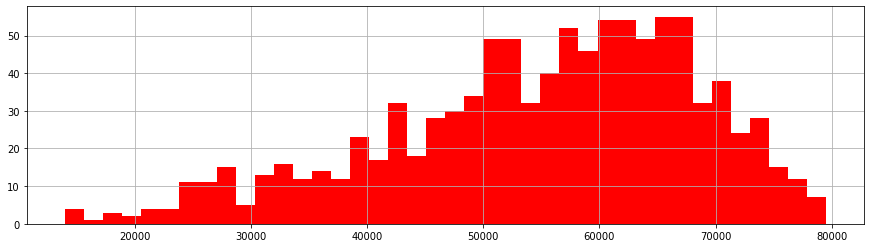

In [15]:
df['Area Income'].hist(color = 'red', bins = 40, figsize = (15,4))

In [16]:
df.drop(['Ad Topic Line', 'City', 'Country', 'Timestamp'], axis =1, inplace = True)

In [17]:
df.head()

,Daily Time Spent on Site,Age,Area Income,Daily Internet Usage,Male,Clicked on Ad
0,68.95,35,61833.90,256.09,0,0
1,80.23,31,68441.85,193.77,1,0
2,69.47,26,59785.94,236.50,0,0
3,74.15,29,54806.18,245.89,1,0
4,68.37,35,73889.99,225.58,0,0


In [23]:
X = df.drop('Clicked on Ad', axis = 1)
y = df['Clicked on Ad']

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X_train, X_test, y_train, y_test = train_test_split(X,y , test_size = 0.3, random_state = 42)

In [26]:
from sklearn.linear_model import LogisticRegression

In [30]:
logReg = LogisticRegression(solver = 'liblinear')
logReg.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
y_pred = logReg.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix

In [34]:
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.84      0.97      0.90       146
           1       0.96      0.82      0.89       154

    accuracy                           0.89       300
   macro avg       0.90      0.90      0.89       300
weighted avg       0.90      0.89      0.89       300

[[141   5]
 [ 27 127]]
